# Supervised Learning: Decision Trees

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|**classification**|
|unsupervised|dimension reduction|clustering|

Previously we saw a powerful discriminative classifier, **Support Vector Machines**.
Here we'll take a look at motivating another powerful algorithm (*non-parametric*) - **Decision Trees**. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# import warnings
# warnings.filterwarnings('ignore')

## Decision Trees

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

- An inductive learning task
    - Use particular facts to make more generalized conclusions

- A predictive model based on a branching series of Boolean tests
    - These smaller Boolean tests are less complex than a one-stage classifier

Let’s look at a sample decision tree…


<center><img src="./images/dt1.png" class="center" alt="Decision Tree" style="width: 600px;"/>
</center>

### Question: If we leave at 10 AM and there are no cars stalled on the road, what will our commute time be?

- In this decision tree, we made a series of Boolean decisions and followed the corresponding branch
    - Did we leave at 10 AM?
    - Did a car stall on the road?
    - Is there an accident on the road?

- By answering each of these yes/no questions, we then came to a conclusion on how long our commute might take

### How to Create a Decision Tree!

- We first make a list of attributes that we can measure
    - These attributes (for now) must be discrete


- We then choose a *target attribute* (**Y**) that we want to predict


- Then create an *experience table* (**X**) that lists what we have seen in the past


#### Sample Experience Table

<center><img src="./images/dt2.png" class="center" alt="Decision Tree" style="width: 800px;"/>
</center>

### Choosing Attributes

- The previous experience decision table showed 4 attributes: hour, weather, accident and stall


- But the decision tree only showed 3 attributes: hour, accident and stall


- Why is that?


- Methods for selecting attributes (which will be described later) show that weather is not a discriminating attribute


- We use the principle of *Occam’s Razor*:  Given a number of competing hypotheses, the simplest one is preferable


- The basic structure of creating a decision tree is the same for most decision tree algorithms


- The difference lies in how we select the attributes for the tree


- We will focus on the ID3 algorithm developed by Ross Quinlan in 1975


### Decision Treee Algorithm

- The basic idea behind any decision tree algorithm is as follows:
    
    
    - Choose the best attribute(s) to split the remaining instances and make that attribute a decision node
    
    
    - Repeat this process for recursively for each child
    
    
    - Stop when:
        - All the instances have the same target attribute value
        - There are no more attributes
        - There are no more instances


### Identifying the Best Attributes

- Refer back to our original decision tree

<center><img src="./images/dt3.png" class="center" alt="Decision Tree" style="width: 600px;"/>
</center>

- How did we know to split on leave at and then on stall and accident and not weather?


- ID3 splits on attributes with the lowest entropy

#### Entropy

- We calculate the entropy for all values of an attribute as the weighted sum of subset entropies as follows:
    $$ \sum_{i=1}^{k} |S_i| / |S| Entropy (S_i) $$
    - where, k is the range of the attribute we are testing


#### Information Gain

- We can also measure information gain (which is inversely proportional to entropy) as follows:
     $$ Entropy(S) - \sum_{i=1}^{k} |S_i| / |S| Entropy (S_i) $$


- Given our commute time sample set, we can calculate the entropy of each attribute at the root node


<center><img src="./images/dt4.png" class="center" alt="Decision Tree" style="width: 600px;"/>
</center>

### Information Gain

<center>
    
    <div id="container"> <img src="./images/dt5.png" class="center" alt="Decision Tree1" style="width: 400px;"/> 
    **Split over attribute 1**
   
</center>



<center>
    
    <div id="container"> <img src="./images/dt6.png" class="center" alt="Decision Tree1" style="width: 540px;"/> 
    **Split over attribute 2**
   
</center>

#### Entropy - A measure for impurity

- Are you able to differentiate the classes based on the attribute split?

<center>
    
    <div id="container"> <img src="./images/dt7.png" class="center" alt="Decision Tree1" style="width: 200px;"/> 
    **Impure**
   
</center>

<center>
    
    <div id="container"> <img src="./images/dt8.png" class="center" alt="Decision Tree1" style="width: 200px;"/> 
    **Pure**
   
</center>

$$ Entropy = \sum_{i} - p_i \log_{2} p_i$$
where, 
- $p_i$ is the probability of class $i$

#### Lets look at an example

   
<center>
<div id="container"> <img src="./images/dt9.png" class="center" alt="Decision Tree1" style="width: 200px;"/> 
   
</center>


- The example has two classes:
    - Total samples
        - Red - 16 instances
        - Yellow - 14 instances

- $p_{red} = 16/30$ 
    - $\log_{2}(16/30) = -0.9$
- $p_{yellow} = 14/30$ 
    - $\log_{2}(14/30) = -1.1$

$$Entropy = -(16/30)(-0.9) - (14/30)(-1.1) = .99$$

### Information Gain - In Decision Tree

   
<center>
<div id="container"> <img src="./images/dt10.png" class="center" alt="Decision Tree1" style="width: 600px;"/> 
       
</center>

$$Entropy_{Parent} = -(\frac{14}{30}*\log_{2}\frac{14}{30}) - (\frac{16}{30}*\log_{2}\frac{16}{30}) = 0.996$$

$$Entropy_{Child1} = -(\frac{13}{30}*\log_{2}\frac{13}{30}) - (\frac{4}{30}*\log_{2}\frac{4}{30}) = 0.787$$

$$Entropy_{Child2} = -(\frac{1}{30}*\log_{2}\frac{1}{30}) - (\frac{12}{30}*\log_{2}\frac{12}{30}) = 0.391$$

$$Entropy_{Children}^{Weighted} = (\frac{17}{30}*0.787) + (\frac{13}{30}*0.391) = 0.615$$

$$\textbf{Information-Gain} = 0.996 - 0.615 = 0.38$$




- ***The goal is to maximize $\textbf{Information-Gain}$ for a split***. 
    - This is the intution behind Decision trees

   
<center>
<div id="container"> <img src="./images/dt12.png" class="center" alt="Decision Tree1" style="width: 900px;"/> 
       
</center>

   
<center>
<div id="container"> <img src="./images/dt11.png" class="center" alt="Decision Tree1" style="width: 900px;"/> 
       
</center>

### Creating a Decision Tree

Here's an example of a decision tree classifier in scikit-learn. We'll start by defining some two-dimensional labeled data:

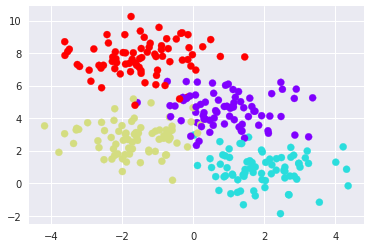

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

We have some convenience functions in the repository that help 

In [4]:
from fig_code import visualize_tree, plot_tree_interactive

Now using IPython's ``interact`` (available in IPython 2.0+, and requires a live kernel) we can view the decision tree splits:

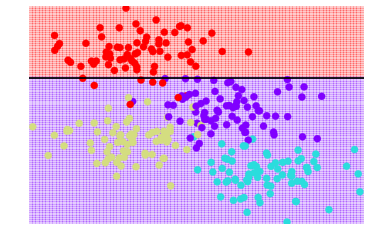

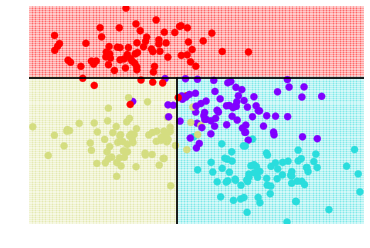

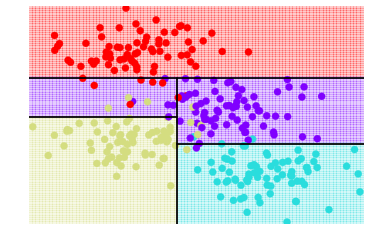

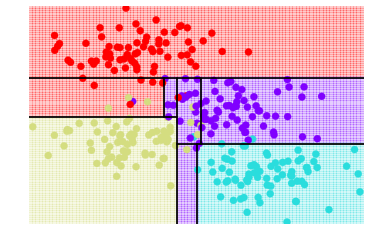

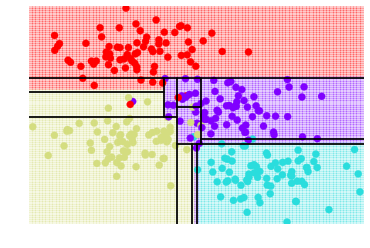

In [5]:
plot_tree_interactive(X, y);

Notice that at each increase in depth, every node is split in two **except** those nodes which contain only a single class.
The result is a very fast **non-parametric** classification, and can be extremely useful in practice.

**Question: Do you see any problems with this?**

## Problems with Decision Trees!

- While decision trees classify quickly, the time for building a tree may be higher than another type of classifier

- Decision trees suffer from a problem of errors propagating throughout a tree
    - A very serious problem as the number of classes increases


#### Error Propagation

- Since decision trees work by a series of local decisions, what happens when one of these local decisions is wrong?
    - Every decision from that point on may be wrong
    - We may never return to the correct path of the tree
    
- **Decision Trees have very high variance**


### Decision Trees and over-fitting

One issue with decision trees is that it is very easy to create trees which **over-fit** the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

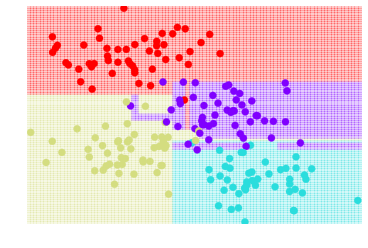

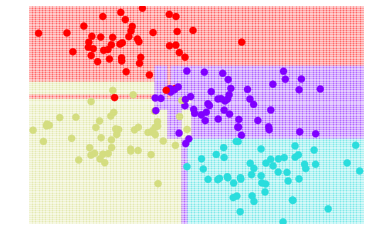

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

### Avoiding Overfitting

- Stop growing when data split is not statistically significant

- Get more data

- Remove non-relevant attribtutes - Feature Tuning 

- Pruning 
    - Grow full tree and then remove branches with low information gain